In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##Parámetros


In [ ]:
k = 5
l = 3
m = 2
g = 9.8
r0 = 15
theta = np.pi/8
r_prima0 = 0
theta_prima0 = 0

In [ ]:
def rprimaprima(r,r_prima,theta,theta_prima):
  return (k/m)*(l-r)+g*np.cos(theta)+r*(theta_prima**2)
def thetaprimaprima(r,r_prima,theta,theta_prima):
  return (-g/r)*np.sin(theta)-(2/r)*r_prima*theta_prima

In [ ]:
def constructor(r0,r_prima0,t0,tmax,N,h,a1,a2):
  tiempo = np.linspace(t0,tmax,N)

  radio_r = [1]
  velocidad_r = [1]

  radio_theta = [1]
  velocidad_theta = [1]

  radio_r.append(r0)
  velocidad_r.append(r_prima0)

  radio_theta.append(theta_prima0)
  velocidad_theta.append(r_prima0)

  for i in range(len(tiempo)):
    r_ = radio_r[i] + h*velocidad_r[i] + 1/6*(4*a1(radio_r[i+1],velocidad_r[i+1],radio_theta[i+1],velocidad_theta[i+1])-a1(radio_r[i],velocidad_r[i],radio_theta[i],velocidad_theta[i]))*(h**2)
    v_r_ = velocidad_r[i+1] + 1/2*(3*a1(radio_r[i+1],velocidad_r[i+1],radio_theta[i+1],velocidad_theta[i+1])-a1(radio_r[i],velocidad_r[i],radio_theta[i],velocidad_theta[i]))*h
    
    r_theta = radio_theta[i] + h*velocidad_theta[i] + 1/6*(4*a2(radio_r[i+1],velocidad_r[i+1],radio_theta[i+1],velocidad_theta[i+1])-a2(radio_r[i],velocidad_r[i],radio_theta[i],velocidad_theta[i]))*(h**2)
    v_theta = velocidad_theta[i+1] + 1/2*(3*a2(radio_r[i+1],velocidad_r[i+1],radio_theta[i+1],velocidad_theta[i+1])-a2(radio_r[i],velocidad_r[i],radio_theta[i],velocidad_theta[i]))*h
    velocidad_theta.append(v_theta)

    radio_r.append(r_)
    velocidad_r.append(v_r_) 
    radio_theta.append(r_theta)
    velocidad_theta.append(v_theta)
  return (radio_r,velocidad_r,radio_theta,velocidad_theta)


##d)


In [ ]:
radio_r,velocidad_r,radio_theta,velocidad_theta = constructor(r0,r_prima0,t0=0,tmax=30,N=2001,h=0.015,a1=rprimaprima,a2=thetaprimaprima)

##f)


In [ ]:
x = []
y = []

for i in range(len(radio_r)):
  x.append(radio_r[i]*np.cos(radio_theta[i] - np.pi/2)) 
  y.append(radio_r[i]*np.sin(radio_theta[i] - np.pi/2))

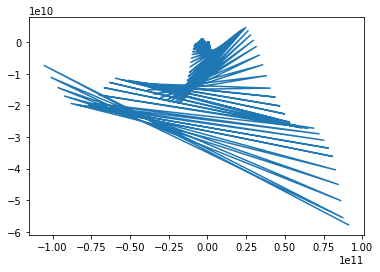

In [ ]:
plt.plot(x,y)